In [1]:
import torch.nn as nn
from torchsummary import summary
import torchvision
from itertools import combinations
from collections import defaultdict
import math

In [2]:
resnet50 = torchvision.models.resnet50(pretrained=True)
modules=list(resnet50.children())[:-1]
resnet50=nn.Sequential(*modules)
for p in resnet50.parameters():
    p.requires_grad = False

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/yujin/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
model = torchvision.models.resnet152(pretrained=True)
model

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.font_manager as fm
import matplotlib as mpl

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 23
datas = ['mini_test', 'crop','euro', 'isic', 'chest']
backbone = ['18', '34', '50', '101', '152']
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])
print(mpl.matplotlib_fname())

['sans-serif']
23.0
/home/yujin/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


## Baseline Accuracy

In [6]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/torch_resnet152_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,92.96 ± 0.53,99.09 ± 0.10
crop,72.76 ± 0.87,92.16 ± 0.47
euro,64.98 ± 0.85,85.24 ± 0.56
isic,29.33 ± 0.51,42.69 ± 0.58
chest,22.35 ± 0.40,24.99 ± 0.41


In [7]:
df = pd.DataFrame(None, columns = backbone, index = datas)
for model in df.columns:
    for data in df.index:
        path = "./logs/baseline/output/torch_resnet{}_simclr_LS_default/{}/05way_001shot_head_default/".format(str(model), data)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][model] = acc
display(result)

,1shot,5shot
mini_test,92.96 ± 0.53,99.09 ± 0.10
crop,72.76 ± 0.87,92.16 ± 0.47
euro,64.98 ± 0.85,85.24 ± 0.56
isic,29.33 ± 0.51,42.69 ± 0.58
chest,22.35 ± 0.40,24.99 ± 0.41


,18,34,50,101,152
mini_test,80.0089,83.1622,90.8667,91.9267,92.9600
crop,74.2067,70.6800,74.2156,72.7800,72.7600
euro,65.4911,65.0244,66.5289,66.4867,64.9844
isic,30.0911,28.8222,29.5844,30.1844,29.3267
chest,22.1200,21.8089,22.1756,22.2756,22.3489


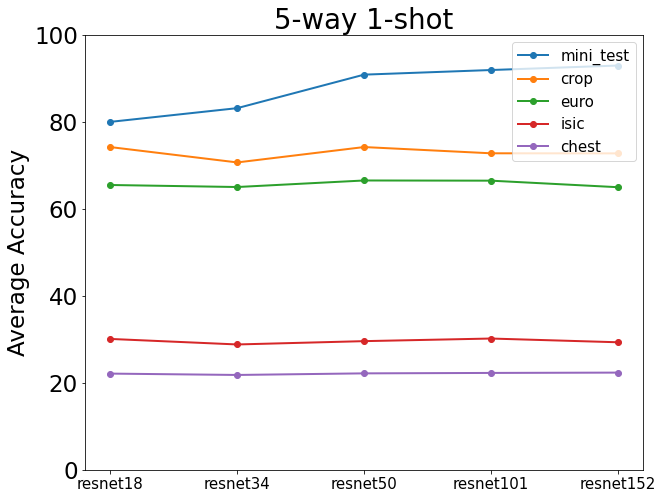

In [39]:
# std 1 shot
fig = plt.figure(figsize=(10,8))
result = pd.DataFrame(None, index=datas, columns=backbone)
for data in result.index:
    for model in result.columns:
        path = "./logs/baseline/output/torch_resnet{}_simclr_LS_default/{}/05way_001shot_head_default/".format(model, data)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        instab = '{:.4f}'.format(test_acc.mean()[-1]*100)
        result.loc[data][model] = instab
model_name = ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152']
display(result)

for data in result.index:
    
    plt.plot([float(value) for value in result.loc[data]], marker ='o', label=data)
    plt.xticks([0, 1, 2, 3, 4], model_name, size = 15)
plt.legend(loc=1, fontsize = 15)
plt.title("5-way 1-shot")
plt.ylim([0, 100])
plt.ylabel('Average Accuracy')
plt.savefig('./img_pdf/instability_backbone/std/1shot.pdf', bbox_inches='tight', format='pdf')
plt.show()

,18,34,50,101,152
mini_test,96.9733,98.0800,98.7800,98.9978,99.0867
crop,93.1156,91.4467,92.8356,92.2844,92.1644
euro,85.3844,85.2578,85.6911,86.0378,85.2400
isic,42.4089,40.1911,42.4578,42.7511,42.6889
chest,25.1800,24.5800,24.9667,24.9978,24.9933


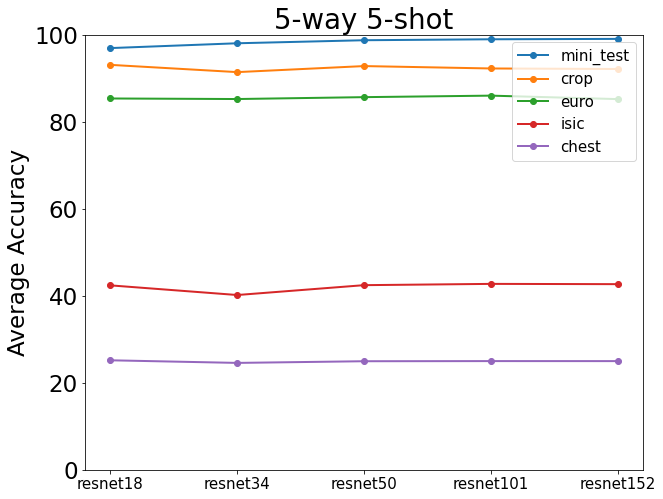

In [40]:
# std 1 shot
fig = plt.figure(figsize=(10,8))
result = pd.DataFrame(None, index=datas, columns=backbone)
for data in result.index:
    for model in result.columns:
        path = "./logs/baseline/output/torch_resnet{}_simclr_LS_default/{}/05way_005shot_head_default/".format(model, data)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        instab = '{:.4f}'.format(test_acc.mean()[-1]*100)
        result.loc[data][model] = instab
model_name = ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152']
display(result)

for data in result.index:
    
    plt.plot([float(value) for value in result.loc[data]], marker ='o', label=data)
    plt.xticks([0, 1, 2, 3, 4], model_name, size = 15)
plt.legend(loc=1, fontsize = 15)
plt.title("5-way 5-shot")
plt.ylim([0, 100])
plt.ylabel('Average Accuracy')
plt.savefig('./img_pdf/instability_backbone/std/1shot.pdf', bbox_inches='tight', format='pdf')
plt.show()

## Instability

,18,34,50,101,152
mini_test,10.3804,10.0999,7.4829,6.8715,6.6591
crop,10.9074,11.3564,11.1598,11.2582,10.8390
euro,10.9042,10.9972,10.7897,11.2236,10.6137
isic,6.4107,6.3784,6.7178,6.6626,6.4282
chest,4.8889,4.5501,4.6933,4.7880,5.0565


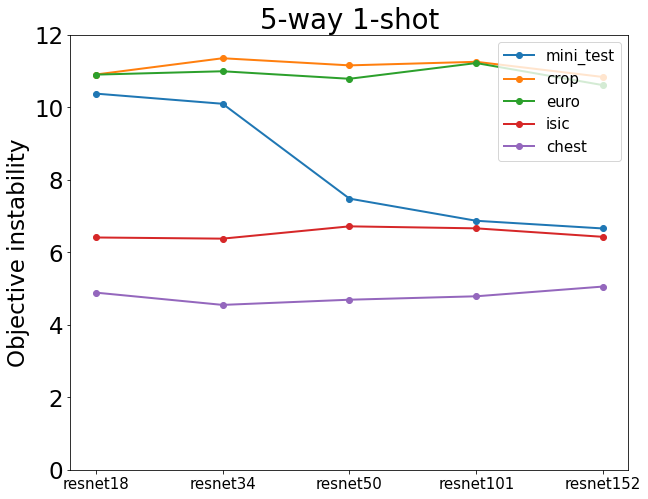

In [32]:
# std 1 shot
fig = plt.figure(figsize=(10,8))
result = pd.DataFrame(None, index=datas, columns=backbone)
for data in result.index:
    for model in result.columns:
        path = "./logs/baseline/output/torch_resnet{}_simclr_LS_default/{}/05way_001shot_head_default/".format(model, data)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        instab = '{:.4f}'.format(test_acc .std()[-1]*100)
        result.loc[data][model] = instab
model_name = ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152']
display(result)

for data in result.index:
    
    plt.plot([float(value) for value in result.loc[data]], marker ='o', label=data)
    plt.xticks([0, 1, 2, 3, 4], model_name, size = 15)
plt.legend(loc=1, fontsize = 15)
plt.title("5-way 1-shot")
plt.ylim([0, 12])
plt.ylabel('Objective instability')
plt.savefig('./img_pdf/instability_backbone/std/1shot.pdf', bbox_inches='tight', format='pdf')
plt.show()

# # 5shot
# fig = plt.figure(figsize=(10, 8))
# result = pd.DataFrame(None, index=datas, columns=backbone)
# for data in result.index:
#     for model in result.columns:
#         path = "./logs/baseline/output/torch_resnet{}_simclr_LS_default/{}/05way_005shot_head_default/".format(str(model), data)
#         test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
#         instab = '{:.4f}'.format(test_acc .std()[-1]*100)
#         result.loc[data][model] = instab
# display(result)

# for data in result.index:
#     plt.xticks([0, 1, 2, 3, 4], model_name, size = 15)
#     plt.plot([float(value) for value in result.loc[data]], marker = 'o', label=data)
# plt.legend(loc=1, fontsize = 15)
# plt.title("5-way 5-shot")
# plt.savefig('./img_pdf/instability_backbone/std/5shot.pdf', bbox_inches='tight', format='pdf')
# plt.ylabel('Objective instability')
# plt.ylim([0, 12])
# plt.show()

,18,34,50,101,152
mini_test,0.1297,0.1214,0.0824,0.0747,0.0716
crop,0.1470,0.1607,0.1504,0.1547,0.1490
euro,0.1665,0.1691,0.1622,0.1688,0.1633
isic,0.2130,0.2213,0.2271,0.2207,0.2192
chest,0.2210,0.2086,0.2116,0.2149,0.2263


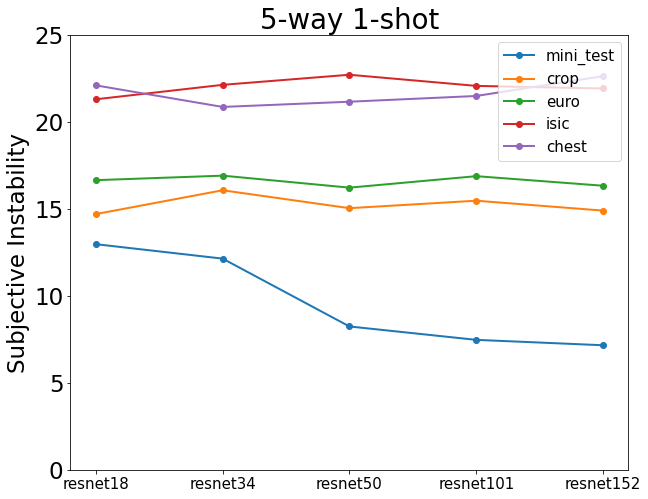

In [33]:
# std/mean 
# 1shot
fig = plt.figure(figsize=(10, 8))
result = pd.DataFrame(None, index=datas, columns=backbone)
for data in result.index:
    for model in result.columns:
        path = "./logs/baseline/output/torch_resnet{}_simclr_LS_default/{}/05way_001shot_head_default/".format(str(model), data)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        instab = '{:.4f}'.format(test_acc .std()[-1]*100 / (test_acc.mean()[-1]*100))
        result.loc[data][model] = instab
display(result)
for data in result.index:
    plt.xticks([0, 1, 2, 3, 4], model_name, size = 15)
    plt.plot([float(value)*100 for value in result.loc[data]], label=data, marker = 'o')
plt.legend(loc=1, fontsize = 15)
plt.title("5-way 1-shot")
plt.savefig('./img_pdf/instability_backbone/std_mean/1shot.pdf', bbox_inches='tight', format='pdf')
plt.ylabel('Subjective Instability')
plt.ylim([0, 25])
plt.show()

# # 5shot
# fig = plt.figure(figsize=(10, 8))
# result = pd.DataFrame(None, index=datas, columns=backbone)
# for data in result.index:
#     for model in result.columns:
#         path = "./logs/baseline/output/torch_resnet{}_simclr_LS_default/{}/05way_005shot_head_default/".format(str(model), data)
#         test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
#         instab = '{:.4f}'.format(test_acc.std()[-1] / test_acc.mean()[-1])
#         result.loc[data][model] = instab
# display(result)
# for data in result.index:
#     plt.yticks(np.arange(0, 22, 5))
#     plt.xticks([0, 1, 2, 3, 4], model_name, size = 15)
#     plt.plot([float(value)*100 for value in result.loc[data]], label=data, marker='o')
# plt.legend(loc=1, fontsize = 15)
# plt.title("5-way 5-shot")
# plt.savefig('./img_pdf/instability_backbone/std_mean/5shot.pdf', bbox_inches='tight', format='pdf')
# plt.ylabel('Subjective Instability')
# plt.ylim([0, 25])
# plt.show()

## Expected Performance Gain

In [459]:
test_acc

,epoch1,epoch2,epoch3,epoch4,epoch5,epoch6,epoch7,epoch8,epoch9,epoch10,...,epoch91,epoch92,epoch93,epoch94,epoch95,epoch96,epoch97,epoch98,epoch99,epoch100
1,0.226667,0.226667,0.266667,0.173333,0.240000,0.240000,0.226667,0.186667,0.333333,0.253333,...,0.293333,0.293333,0.293333,0.306667,0.306667,0.293333,0.320000,0.306667,0.320000,0.306667
2,0.200000,0.173333,0.200000,0.186667,0.213333,0.213333,0.213333,0.200000,0.213333,0.240000,...,0.253333,0.253333,0.240000,0.253333,0.253333,0.240000,0.226667,0.226667,0.226667,0.226667
3,0.200000,0.226667,0.213333,0.173333,0.213333,0.240000,0.226667,0.240000,0.226667,0.226667,...,0.240000,0.240000,0.240000,0.240000,0.253333,0.240000,0.226667,0.240000,0.240000,0.253333
4,0.200000,0.226667,0.226667,0.160000,0.200000,0.266667,0.173333,0.226667,0.186667,0.226667,...,0.280000,0.253333,0.266667,0.293333,0.306667,0.280000,0.280000,0.280000,0.280000,0.266667
5,0.226667,0.226667,0.226667,0.240000,0.186667,0.266667,0.173333,0.200000,0.240000,0.200000,...,0.226667,0.213333,0.200000,0.213333,0.213333,0.213333,0.213333,0.200000,0.226667,0.213333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.186667,0.200000,0.160000,0.266667,0.226667,0.226667,0.200000,0.280000,0.226667,0.173333,...,0.200000,0.200000,0.186667,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
597,0.200000,0.200000,0.240000,0.200000,0.200000,0.226667,0.226667,0.186667,0.266667,0.280000,...,0.240000,0.266667,0.240000,0.280000,0.266667,0.293333,0.280000,0.280000,0.280000,0.280000
598,0.200000,0.240000,0.213333,0.306667,0.280000,0.253333,0.240000,0.266667,0.266667,0.253333,...,0.240000,0.240000,0.240000,0.240000,0.213333,0.226667,0.226667,0.226667,0.226667,0.240000
599,0.200000,0.200000,0.200000,0.200000,0.213333,0.253333,0.280000,0.226667,0.240000,0.266667,...,0.253333,0.240000,0.240000,0.253333,0.253333,0.266667,0.253333,0.253333,0.253333,0.253333


In [89]:
result.index

Index(['mini_test', 'crop', 'euro', 'isic', 'chest'], dtype='object')

In [8]:
test_acc.std()[-1]*100 

5.425905989386267

In [ ]:
/ test_acc.mean()[-1] * 100

## Hyperparameter Experiment

### Batch Size

In [181]:
result_5shot = pd.DataFrame(None, index=datas, columns=['1', '3', '4', '5', '6', '16', '25'])
#overfitting = pd.DataFrame(None, index=datas, columns=['bs3', 'baseline', 'bs5'])
#instab = pd.DataFrame(None, index=datas, columns=['bs3', 'baseline', 'bs5'])
for data in result_5shot.index:
    for bs in result_5shot.columns:
        path = "./logs/batch_size/output_{:03d}/resnet10_simclr_LS_default/{}/05way_005shot_head_default/".format(int(bs), data)
        if bs == '4' : path = path.replace("output_004", "output").replace("batch_size", "baseline")
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        #overfitting_idx = np.mean(train_acc.iloc[:,-1]-test_acc.iloc[:,-1])
        result_5shot.loc[data][bs] = acc
        #overfitting.loc[data][col] = overfitting_idx
        #instab.loc[data][bs] = test_acc.std()[-1]
result_1shot = pd.DataFrame(None, index=datas, columns=['1', '2', '3', '4', '5'])
#overfitting = pd.DataFrame(None, index=datas, columns=['bs3', 'baseline', 'bs5'])
#instab = pd.DataFrame(None, index=datas, columns=['bs3', 'baseline', 'bs5'])
for data in result_1shot.index:
    for bs in result_1shot.columns:
        path = "./logs/batch_size/output_{:03d}/resnet10_simclr_LS_default/{}/05way_001shot_head_default/".format(int(bs), data)
        if bs == '4' : path = path.replace("output_004", "output").replace("batch_size", "baseline")
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        #overfitting_idx = np.mean(train_acc.iloc[:,-1]-test_acc.iloc[:,-1])
        result_1shot.loc[data][bs] = acc
        #overfitting.loc[data][col] = overfitting_idx
        #instab.loc[data][bs] = test_acc.std()[-1]
        
display(result_5shot)
display(result_1shot)
# display(overfitting)
#display(instab)

,1,3,4,5,6,16,25
mini_test,77.77 ± 0.62,78.06 ± 0.60,78.06 ± 0.61,77.98 ± 0.61,77.98 ± 0.62,78.14 ± 0.61,77.94 ± 0.61
crop,91.47 ± 0.49,91.48 ± 0.48,91.54 ± 0.48,91.52 ± 0.48,91.52 ± 0.48,91.53 ± 0.48,91.55 ± 0.47
euro,84.15 ± 0.61,84.19 ± 0.59,84.10 ± 0.60,84.18 ± 0.60,84.20 ± 0.60,84.27 ± 0.60,84.25 ± 0.60
isic,40.32 ± 0.54,40.34 ± 0.55,40.44 ± 0.56,40.33 ± 0.56,40.39 ± 0.55,40.36 ± 0.55,40.36 ± 0.55
chest,26.76 ± 0.43,26.60 ± 0.43,26.78 ± 0.42,26.74 ± 0.43,26.48 ± 0.42,26.75 ± 0.43,26.73 ± 0.42


,1,2,3,4,5
mini_test,54.08 ± 0.80,55.70 ± 0.81,56.05 ± 0.82,56.32 ± 0.84,56.25 ± 0.81
crop,72.77 ± 0.86,73.38 ± 0.87,73.54 ± 0.87,73.10 ± 0.89,73.35 ± 0.86
euro,64.65 ± 0.89,64.78 ± 0.88,64.72 ± 0.89,64.72 ± 0.88,64.82 ± 0.89
isic,29.23 ± 0.55,29.36 ± 0.54,29.41 ± 0.55,29.26 ± 0.55,29.47 ± 0.56
chest,22.80 ± 0.39,22.85 ± 0.41,22.74 ± 0.41,22.83 ± 0.41,22.74 ± 0.40


### Learning Rate

In [180]:
result_5shot = pd.DataFrame(None, index=datas, 
                      columns=['0.001','0.005', '0.01', '0.03', '0.05', '0.1', '0.3'])
#instab  = pd.DataFrame(None, index=datas, columns=['0,001','0.005', '0,01', '0.03', '0.05', '0.1', '0.3'])

result_1shot = pd.DataFrame(None, index=datas, 
                      columns=['0.001','0.005', '0.01', '0.03', '0.05', '0.1', '0.3'])

for data in result_5shot.index:
    for lr in result_5shot.columns:
        path = "./logs/learning_rate/output_{}/resnet10_simclr_LS_default/{}/05way_005shot_head_default/test_history.csv".format(lr, data)
        if lr == '0.01' : path = path.replace("output_0.01", "output").replace("learning_rate", "baseline")
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result_5shot.loc[data][lr] = acc
        #instab.loc[data][lr] = test_acc.std()[-1]

for data in result_1shot.index:
    for lr in result_1shot.columns:
        path = "./logs/learning_rate/output_{}/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_history.csv".format(lr, data)
        if lr == '0.01' : path = path.replace("output_0.01", "output").replace("learning_rate", "baseline")
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result_1shot.loc[data][lr] = acc
display(result_5shot)
display(result_1shot)
#display(instab)

,0.001,0.005,0.01,0.03,0.05,0.1,0.3
mini_test,76.12 ± 0.63,77.91 ± 0.61,78.06 ± 0.61,77.80 ± 0.62,77.25 ± 0.62,74.94 ± 0.64,70.08 ± 0.69
crop,89.33 ± 0.54,91.25 ± 0.50,91.54 ± 0.48,91.61 ± 0.48,91.46 ± 0.48,90.77 ± 0.50,87.61 ± 0.54
euro,82.25 ± 0.64,83.92 ± 0.60,84.10 ± 0.60,84.24 ± 0.60,84.10 ± 0.60,83.48 ± 0.61,80.81 ± 0.65
isic,38.41 ± 0.53,40.23 ± 0.54,40.44 ± 0.56,40.42 ± 0.56,40.42 ± 0.56,40.13 ± 0.54,39.08 ± 0.54
chest,25.79 ± 0.42,26.68 ± 0.42,26.78 ± 0.42,26.51 ± 0.42,26.62 ± 0.43,26.60 ± 0.43,26.63 ± 0.43


,0.001,0.005,0.01,0.03,0.05,0.1,0.3
mini_test,51.11 ± 0.79,55.70 ± 0.81,56.32 ± 0.84,55.71 ± 0.84,51.96 ± 0.87,47.97 ± 0.85,45.73 ± 0.87
crop,64.36 ± 0.95,72.46 ± 0.87,73.10 ± 0.89,73.58 ± 0.87,73.03 ± 0.87,67.67 ± 0.96,54.18 ± 1.06
euro,58.95 ± 0.89,65.19 ± 0.88,64.72 ± 0.88,64.70 ± 0.87,65.14 ± 0.89,63.96 ± 0.93,58.58 ± 0.96
isic,27.64 ± 0.51,29.38 ± 0.55,29.26 ± 0.55,29.37 ± 0.53,29.27 ± 0.54,29.00 ± 0.53,27.72 ± 0.52
chest,22.00 ± 0.35,22.60 ± 0.40,22.83 ± 0.41,22.78 ± 0.41,22.76 ± 0.40,22.69 ± 0.40,21.60 ± 0.34


### Optimizer

In [148]:
result_5shot = pd.DataFrame(None, index=datas, 
                      columns=['SGD', 'Adam', 'Adagrad', 'RMSprop', 'RMSprop_no_momentum'])
result_1shot = pd.DataFrame(None, index=datas, 
                      columns=['SGD', 'Adam', 'Adagrad', 'RMSprop', 'RMSprop_no_momentum'])
# instab = pd.DataFrame(None, index=datas, 
#                       columns=['SGD', 'Adam', 'RMSprop'])
for data in result_5shot.index:
    for optim in result_5shot.columns:
        path = "./logs/optimizer/output_{}/resnet10_simclr_LS_default/{}/05way_005shot_head_default/test_history.csv".format(optim, data)
        if optim == 'SGD' : path = path.replace("output_SGD", "output").replace("optimizer", "baseline")
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result_5shot.loc[data][optim] = acc
        #instab.loc[data][optim] = test_acc.std()[-1]
for data in result_1shot.index:
    for optim in result_1shot.columns:
        path = "./logs/optimizer/output_{}/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_history.csv".format(optim, data)
        if optim == 'SGD' : path = path.replace("output_SGD", "output").replace("optimizer", "baseline")
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result_1shot.loc[data][optim] = acc
display(result_5shot)
display(result_1shot)
# display(instab)

,SGD,Adam,Adagrad,RMSprop,RMSprop_no_momentum
mini_test,78.06 ± 0.61,77.99 ± 0.61,77.77 ± 0.61,65.78 ± 0.73,74.39 ± 0.87
crop,91.54 ± 0.48,92.04 ± 0.47,91.91 ± 0.48,80.74 ± 0.69,88.16 ± 0.87
euro,84.10 ± 0.60,84.28 ± 0.58,84.41 ± 0.59,77.20 ± 0.70,81.98 ± 0.70
isic,40.44 ± 0.56,41.42 ± 0.57,41.62 ± 0.56,37.90 ± 0.54,40.63 ± 0.56
chest,26.78 ± 0.42,26.50 ± 0.43,26.69 ± 0.42,25.27 ± 0.40,26.50 ± 0.43


,SGD,Adam,Adagrad,RMSprop,RMSprop_no_momentum
mini_test,56.32 ± 0.84,53.68 ± 0.82,55.21 ± 0.82,35.19 ± 0.79,49.39 ± 0.82
crop,73.10 ± 0.89,74.26 ± 0.87,74.12 ± 0.88,47.50 ± 1.11,69.10 ± 0.97
euro,64.72 ± 0.88,63.51 ± 0.84,64.98 ± 0.88,54.12 ± 0.96,63.68 ± 0.89
isic,29.26 ± 0.55,29.91 ± 0.55,29.81 ± 0.55,27.10 ± 0.49,29.69 ± 0.56
chest,22.83 ± 0.41,22.67 ± 0.40,22.80 ± 0.40,21.54 ± 0.33,22.21 ± 0.38


### 

In [ ]:
result_5shot = pd.DataFrame(None, index=datas, 
                      columns=['None', 'CosAnneal', 'CosAnneal_WS', 'Cycle', 'Exp'])
result_1shot = pd.DataFrame(None, index=datas, 
                      columns=['None', 'CosAnneal', 'CosAnneal_WS', 'Cycle', 'Exp'])

for data in result_5shot.index:
    for sched in result_5shot.columns:
        path = "./logs/lr_scheduler/output_{}/resnet10_simclr_LS_default/{}/05way_005shot_head_default/test_history.csv".format(sched, data)
        if sched == 'None' : path = path.replace("output_None", "output").replace("lr_scheduler", "baseline")
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result_5shot.loc[data][sched] = acc
        #instab.loc[data][optim] = test_acc.std()[-1]
for data in result_1shot.index:
    for sched in result_1shot.columns:
        path = "./logs/lr_scheduler/output_{}/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_history.csv".format(sched, data)
        if sched == 'None' : path = path.replace("output_None", "output").replace("lr_scheduler", "baseline")
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result_1shot.loc[data][sched] = acc
display(result_5shot)
display(result_1shot)
# display(instab)

# Baseline

Testing Accuracy of baseline 78.09 ± 0.62
Testing Accuracy of baseline 91.50 ± 0.49
Testing Accuracy of baseline 84.08 ± 0.60
Testing Accuracy of baseline 40.39 ± 0.55
Testing Accuracy of baseline 26.75 ± 0.43


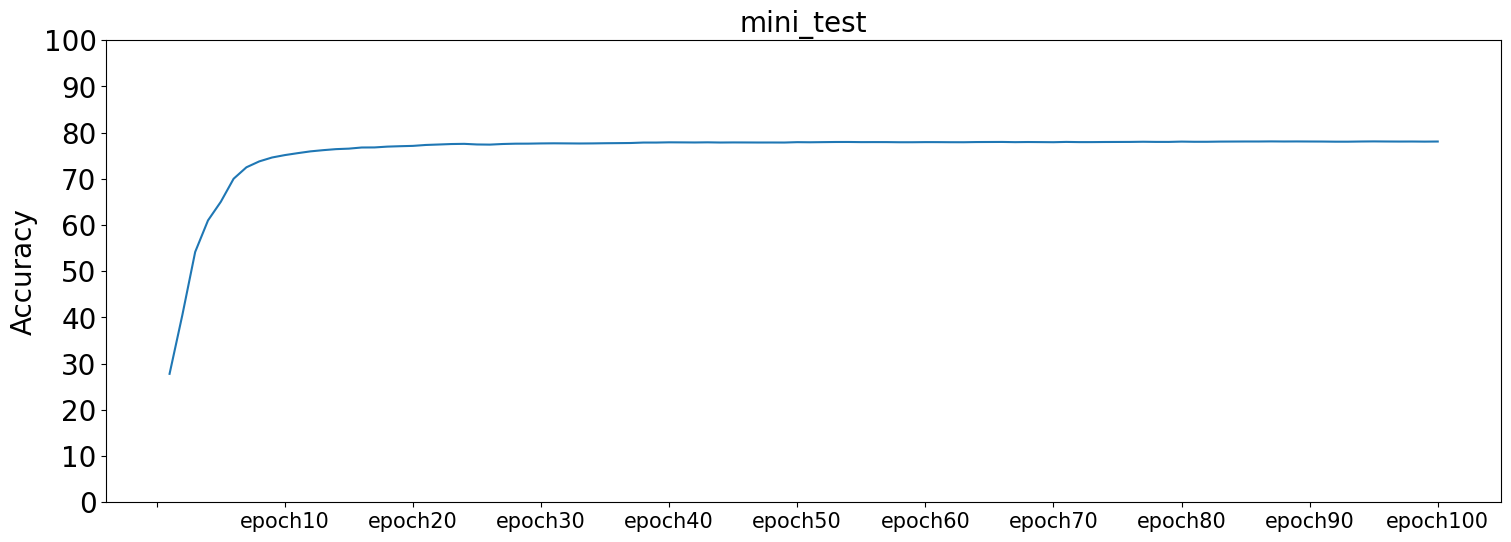

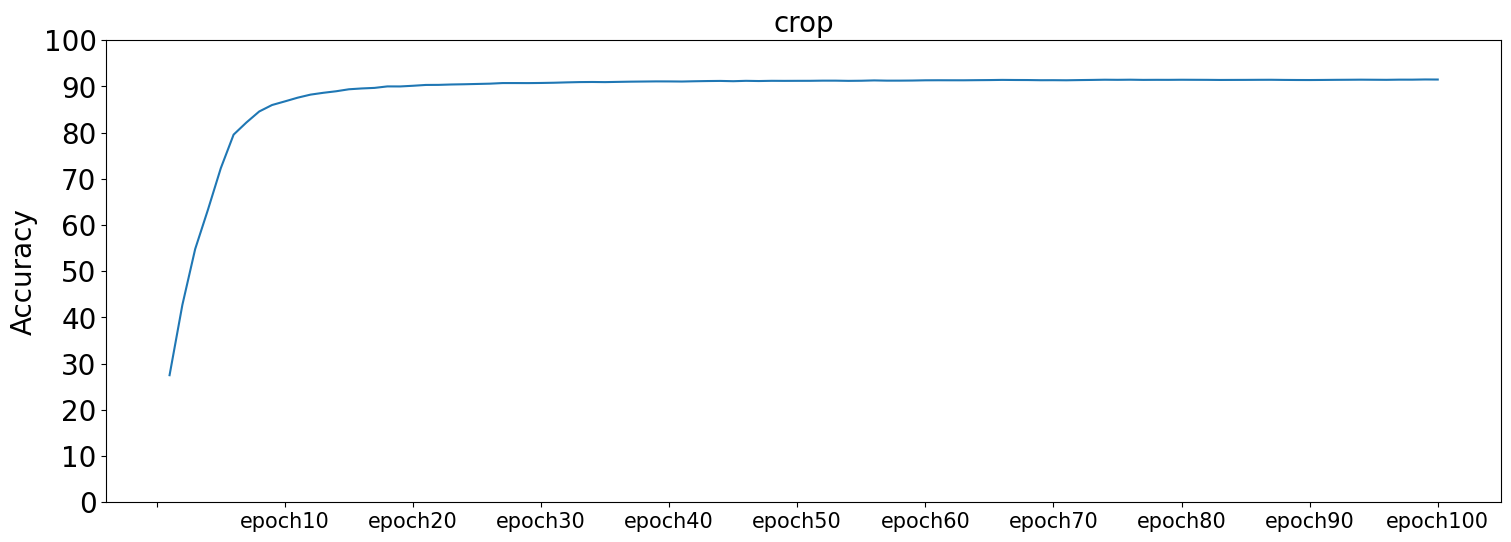

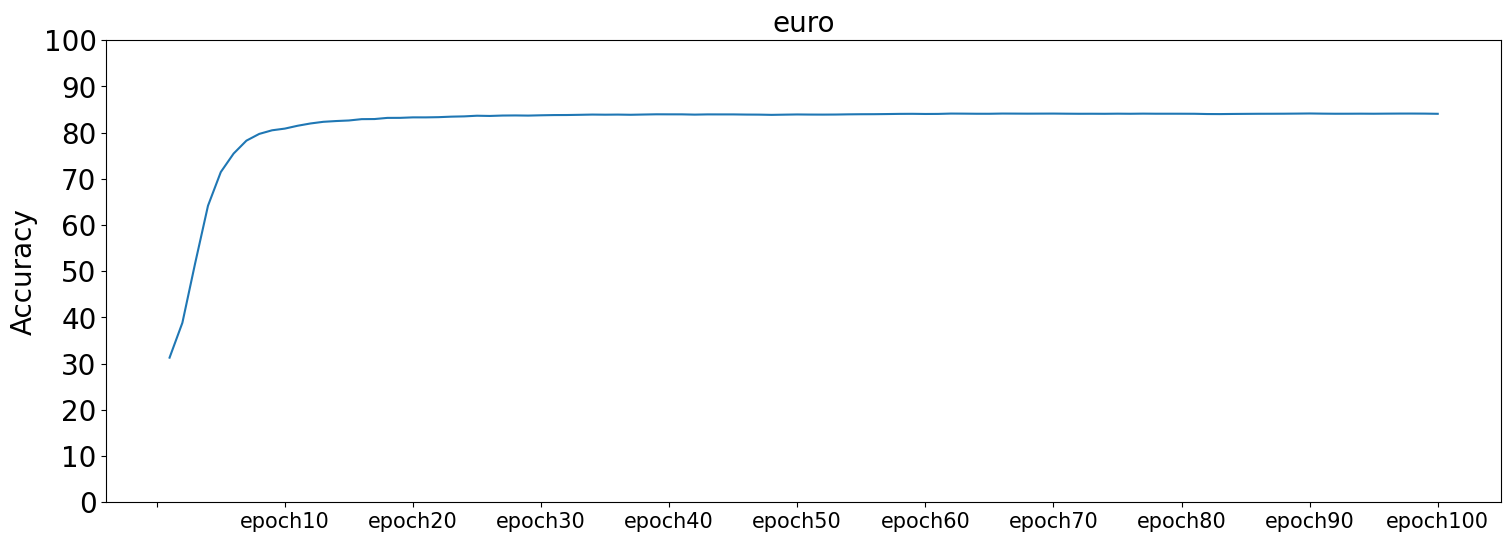

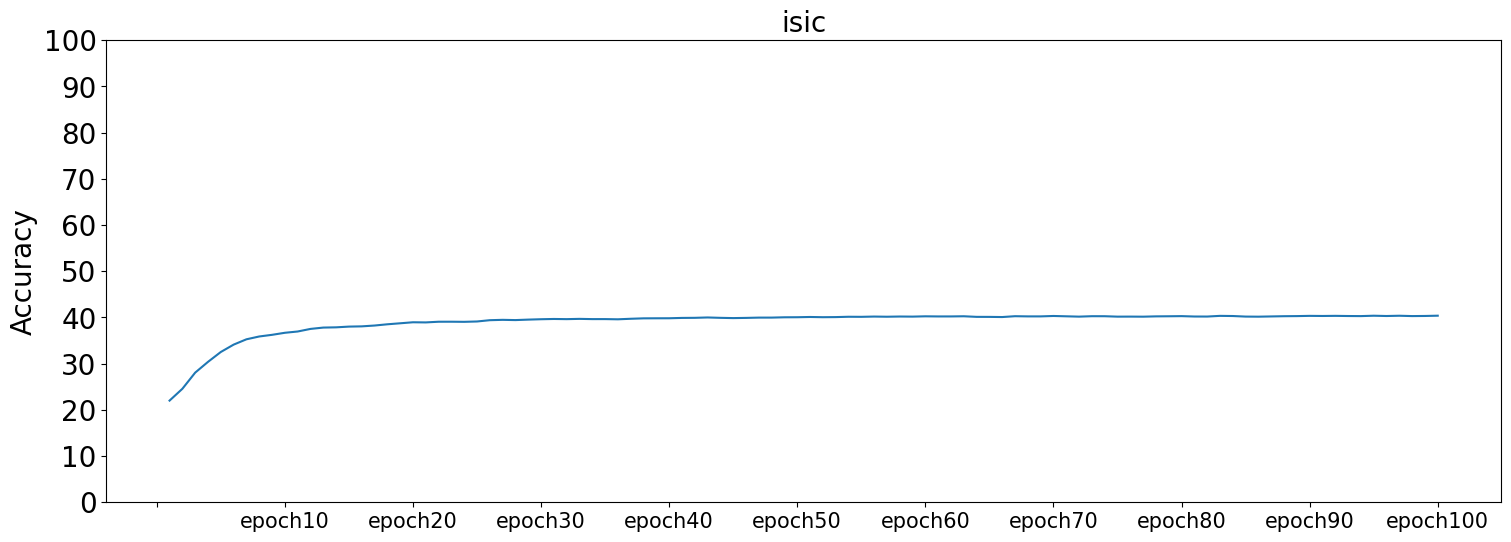

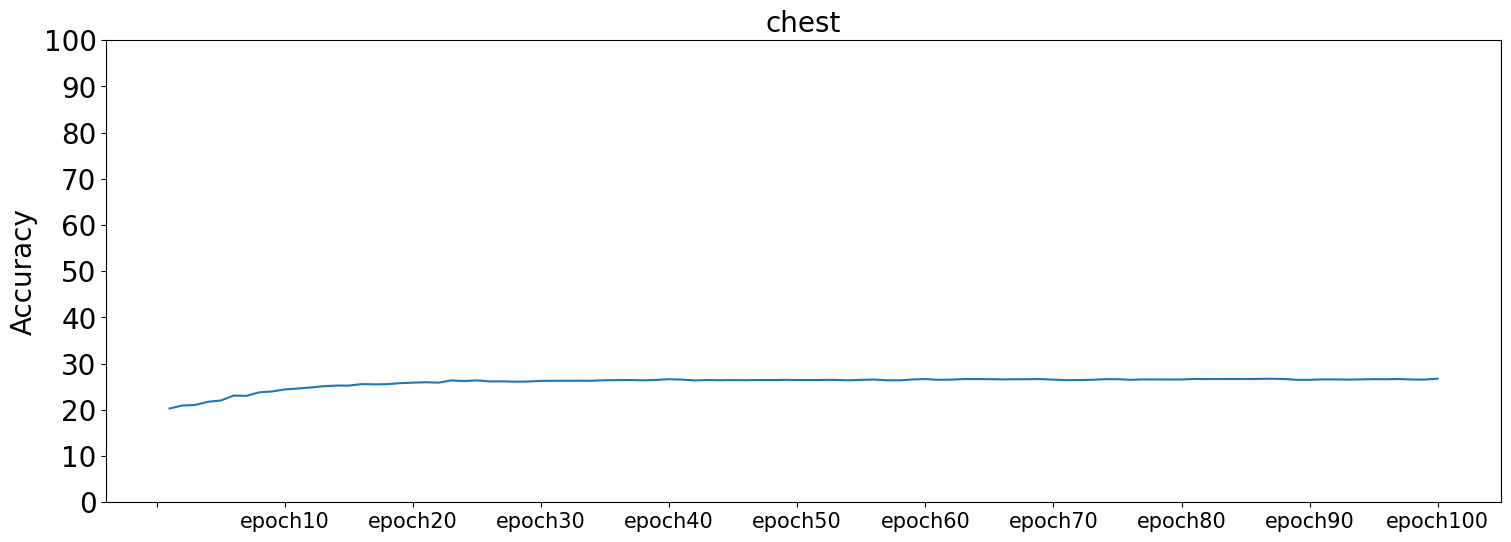

In [195]:
for data in datas:
    test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_head_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    print ('Testing Accuracy of baseline {:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                             1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))
    fig = plt.figure(figsize=(18,6))
    plt.plot(test_acc.mean()*100)
    plt.xticks(np.arange(-1, 100, 10), fontsize = 15)
    plt.yticks(np.arange(0, 101, 10), fontsize = 20)
    plt.ylabel("Accuracy", fontsize=20)
    plt.title(data, fontsize=20)
    plt.savefig('./img_pdf/avg_acc_epoch/5shot/{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    # plt.legend(fontsize=20, loc=1)
#plt.close()

Testing Accuracy of baseline 73.12 ± 0.88


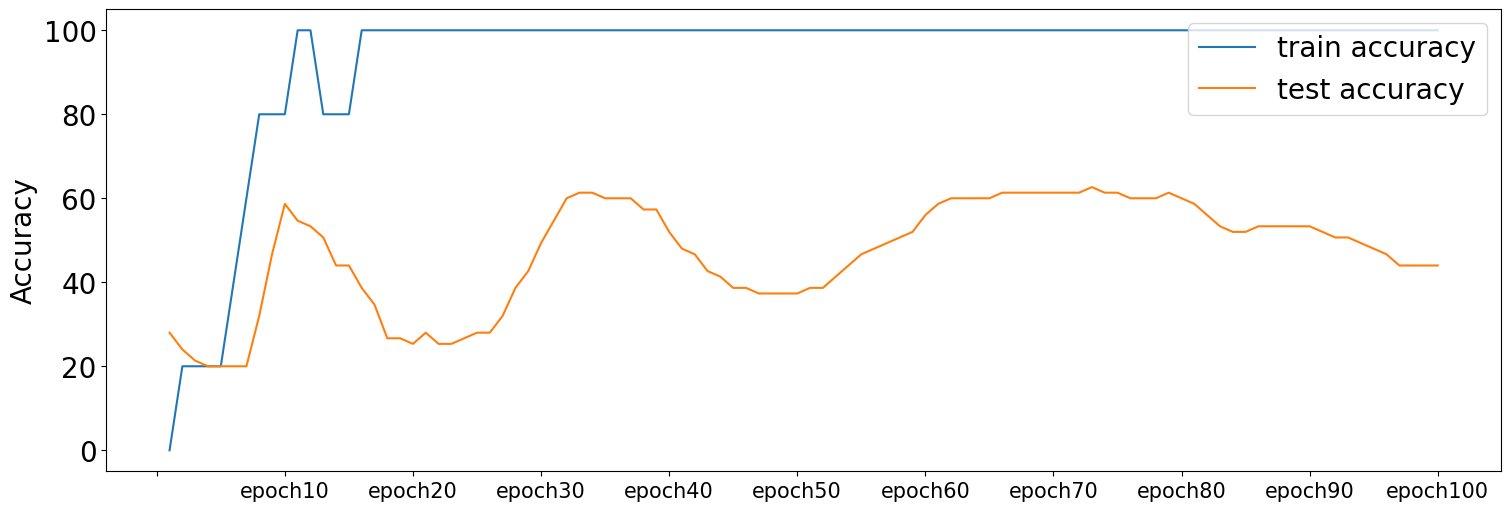

In [176]:
train_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/crop/05way_001shot_head_default/train_history.csv', index_col='Unnamed: 0')
test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/crop/05way_001shot_head_default/test_history.csv', index_col='Unnamed: 0')
print ('Testing Accuracy of baseline {:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))
episode = 547 # up to 600
fig = plt.figure(figsize=(18,6))
plt.plot(train_acc.loc[episode]*100, label='train accuracy'.format(episode))
plt.plot(test_acc.loc[episode]*100, label='test accuracy'.format(episode))
plt.xticks(np.arange(-1, 100, 10), fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()
plt.close()

In [178]:
diff = np.max(test_acc , axis = 1) - test_acc.iloc[:,-1]
print("dff", np.max(diff))

ep = int(np.where(diff == np.max(diff))[0])+1
print("episode:",ep)
print("best", np.max(test_acc.loc[ep]))
print("last", test_acc.iloc[ep-1, -1])
print("index", np.where(test_acc.loc[ep] == np.max(test_acc.loc[ep])))

dff 0.18666666746139526
episode: 547
best 0.6266666650772095
last 0.4399999976158142
index (array([72]),)


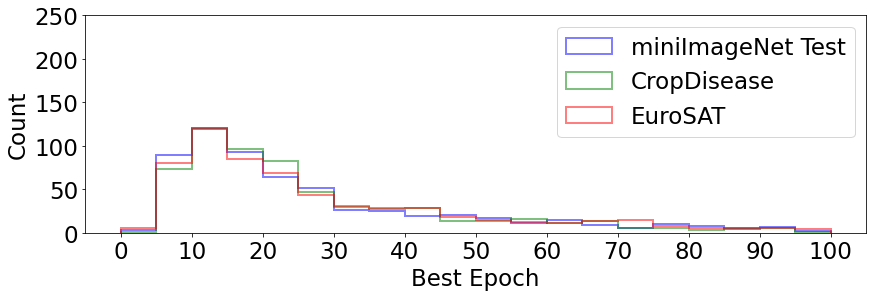

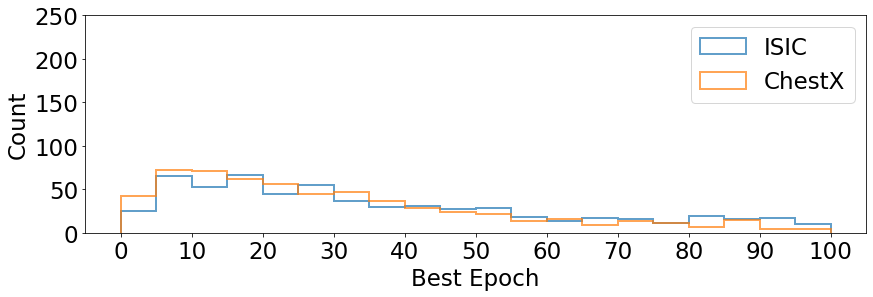

In [160]:
# Best epoch의 분포
color_dict = {'mini_test': 'b', 'crop': 'g', 'euro': 'r'}
for data in ['mini_test', 'crop', 'euro']:
    test_acc_5 = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_head_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    max_index = [np.argmax(test_acc_5.loc[episode]) for episode in range(1, 601)]
    plt.hist(max_index, bins=20, histtype='step', range = (0, 100), color = color_dict[data], alpha=0.5, linewidth = 2)
    plt.xlabel("Best Epoch")
    plt.ylabel("Count")
    plt.xticks(np.arange(0, 101, 10))
    plt.yticks(np.arange(0, 251, 50))
    #plt.tick_params(axis='x', direction='in',labelsize=14, top=True)
    #plt.grid(True)
plt.legend(["miniImageNet Test", "CropDisease", "EuroSAT"])
plt.show()
for data in ['isic', 'chest']:
    test_acc_5 = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_head_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    max_index = [np.argmax(test_acc_5.loc[episode]) for episode in range(1, 601)]
    plt.hist(max_index, bins=20, histtype='step', range = (0, 100), alpha=0.7, linewidth=2)
    plt.xlabel("Best Epoch")
    plt.ylabel("Count")
    plt.xticks(np.arange(0, 101, 10))
    plt.yticks(np.arange(0, 251, 50))
    #plt.tick_params(axis='x', direction='in',labelsize=14, top=True)
    #plt.grid(True)
plt.legend(["ISIC", "ChestX"])
plt.show()

In [231]:
df.columns.tolist()

['crop', 'euro', 'mini_test', 'isic', 'chest']

/tmp/ipykernel_20294/1581405398.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["miniImageNet Test", "CropDisease", "EuroSAT", "ISIC", "ChestX"], fontsize=23)


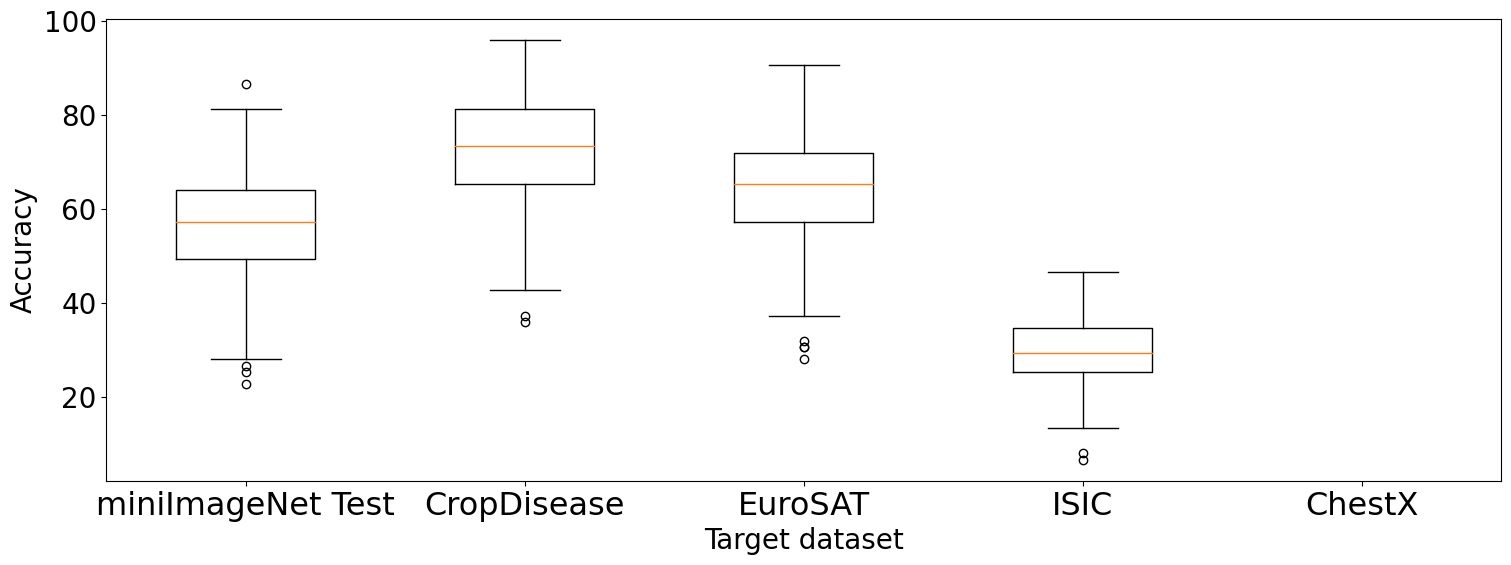

In [237]:
# Box Plot for performance of 600 episodes
plt.style.use ('default')
df = pd.DataFrame()

for data in datas:
    path = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_history.csv'.format(data)
    test_acc = pd.read_csv(path, index_col='Unnamed: 0').rename(columns={'epoch100' : data}).iloc[:,-1]*100
    df = pd.concat([df, test_acc], axis = 1)

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xticklabels(["miniImageNet Test", "CropDisease", "EuroSAT", "ISIC", "ChestX"], fontsize=23)
ax.boxplot(df)
#plt.title("5 way 1 shot", fontsize = 25)
plt.xlabel("Target dataset", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
plt.yticks(fontsize = 20)
#plt.show()
plt.savefig('./img_pdf/instab_btw_episodes_1shot.pdf', bbox_inches='tight', format='pdf')

In [239]:
test_acc

1      24.000001
2      14.666668
3      21.333334
4      21.333334
5      18.666667
         ...    
596          NaN
597          NaN
598          NaN
599          NaN
600          NaN
Name: chest, Length: 600, dtype: float64

In [387]:
train_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/crop/05way_005shot_head_default/train_history.csv', index_col='Unnamed: 0')
test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/crop/05way_005shot_head_default/test_history.csv', index_col='Unnamed: 0')
ub = test_acc.mean()[-1] + 30 * test_acc.std()[-1] / np.sqrt(600) 
lb = test_acc.mean()[-1] - 30 * test_acc.std()[-1] / np.sqrt(600) 

In [388]:
print(ub)
print(lb)

0.989640250930345
0.8438709065028469


In [393]:
que_fail = '(epoch100 < 0.8438709065028469)'
test_acc.query(que_fail).iloc[:,-1]

10     0.826667
13     0.813333
24     0.773333
27     0.786667
33     0.706667
         ...   
547    0.826667
554    0.800000
583    0.840000
592    0.800000
600    0.786667
Name: epoch100, Length: 79, dtype: float64

In [267]:
test_acc

,epoch1,epoch2,epoch3,epoch4,epoch5,epoch6,epoch7,epoch8,epoch9,epoch10,...,epoch91,epoch92,epoch93,epoch94,epoch95,epoch96,epoch97,epoch98,epoch99,epoch100
1,0.320000,0.613333,0.640000,0.746667,0.666667,0.786667,0.866667,0.880000,0.893333,0.933333,...,0.906667,0.906667,0.906667,0.906667,0.906667,0.906667,0.906667,0.906667,0.920000,0.920000
2,0.386667,0.360000,0.506667,0.613333,0.640000,0.573333,0.800000,0.653333,0.746667,0.680000,...,0.906667,0.906667,0.906667,0.906667,0.906667,0.906667,0.906667,0.906667,0.906667,0.906667
3,0.400000,0.400000,0.533333,0.440000,0.640000,0.560000,0.746667,0.466667,0.626667,0.706667,...,0.866667,0.866667,0.880000,0.866667,0.866667,0.866667,0.880000,0.880000,0.866667,0.866667
4,0.440000,0.653333,0.573333,0.813333,0.933333,0.680000,0.840000,0.960000,0.893333,0.986667,...,0.986667,0.986667,0.986667,0.986667,0.986667,0.986667,1.000000,1.000000,1.000000,1.000000
5,0.373333,0.280000,0.613333,0.640000,0.840000,0.720000,0.813333,0.613333,0.920000,0.773333,...,0.920000,0.920000,0.920000,0.920000,0.920000,0.920000,0.920000,0.920000,0.920000,0.920000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.400000,0.306667,0.533333,0.720000,0.506667,0.640000,0.680000,0.666667,0.773333,0.666667,...,0.946667,0.946667,0.946667,0.946667,0.946667,0.946667,0.946667,0.946667,0.946667,0.946667
597,0.200000,0.426667,0.720000,0.720000,0.640000,0.640000,0.893333,0.826667,0.813333,0.853333,...,0.973333,0.973333,0.973333,0.973333,0.973333,0.973333,0.973333,0.973333,0.973333,0.973333
598,0.200000,0.613333,0.706667,0.840000,0.893333,0.933333,0.973333,1.000000,0.960000,0.986667,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
599,0.240000,0.506667,0.280000,0.826667,0.773333,0.706667,0.866667,0.520000,0.893333,0.680000,...,0.973333,0.973333,0.973333,0.973333,0.973333,0.973333,0.973333,0.973333,0.973333,0.973333


In [ ]:
display_side_by_side(df, df_q)

In [422]:
train_loss = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/crop/05way_005shot_head_default/loss_history.csv', index_col='Unnamed: 0')
train_loss

,epoch1,epoch2,epoch3,epoch4,epoch5,epoch6,epoch7,epoch8,epoch9,epoch10,...,epoch91,epoch92,epoch93,epoch94,epoch95,epoch96,epoch97,epoch98,epoch99,epoch100
1,1.849435,1.497202,1.003698,0.823265,0.510329,0.489898,0.208723,0.143556,0.099687,0.091125,...,0.008917,0.008082,0.009085,0.008887,0.008987,0.008731,0.008446,0.009035,0.007906,0.009395
2,1.853785,1.291133,1.050126,0.894315,0.506041,0.539117,0.464449,0.220479,0.377854,0.212597,...,0.011679,0.010316,0.010254,0.010176,0.010128,0.010689,0.010000,0.010979,0.010708,0.011362
3,1.804186,1.430416,1.260182,1.009714,0.706789,0.719492,0.519825,0.693764,0.369317,0.525186,...,0.019381,0.018454,0.020171,0.018425,0.018270,0.018052,0.016263,0.016628,0.018907,0.017373
4,1.986828,1.665442,1.277911,1.201211,0.479356,0.646847,0.509527,0.066043,0.244774,0.092589,...,0.005318,0.005187,0.005359,0.005144,0.004971,0.006070,0.005448,0.007366,0.004917,0.005726
5,1.820399,1.383383,1.111306,0.897043,0.660136,0.525054,0.386972,0.277210,0.337316,0.239563,...,0.014926,0.014030,0.014871,0.014691,0.013996,0.014330,0.013746,0.013665,0.012756,0.013325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,2.014172,1.422603,1.066434,0.780571,0.671145,0.722296,0.353134,0.323289,0.399748,0.135918,...,0.013497,0.011433,0.011500,0.011358,0.011103,0.011434,0.010929,0.011138,0.010709,0.011075
597,2.211585,1.383480,1.332740,1.217504,0.273855,0.674429,0.220888,0.197778,0.100149,0.118677,...,0.006638,0.007788,0.008079,0.006378,0.006433,0.006127,0.006567,0.006223,0.005981,0.005937
598,2.191211,1.481558,1.276014,0.666942,0.569172,0.316537,0.398112,0.200799,0.165832,0.207976,...,0.009036,0.008924,0.010175,0.007610,0.009737,0.007452,0.008253,0.007934,0.008136,0.007959
599,2.501969,2.012371,1.707631,2.351989,1.111830,1.039571,1.136501,1.174372,0.291011,0.442720,...,0.012281,0.009268,0.008389,0.010462,0.009487,0.010602,0.008481,0.009259,0.008523,0.008334


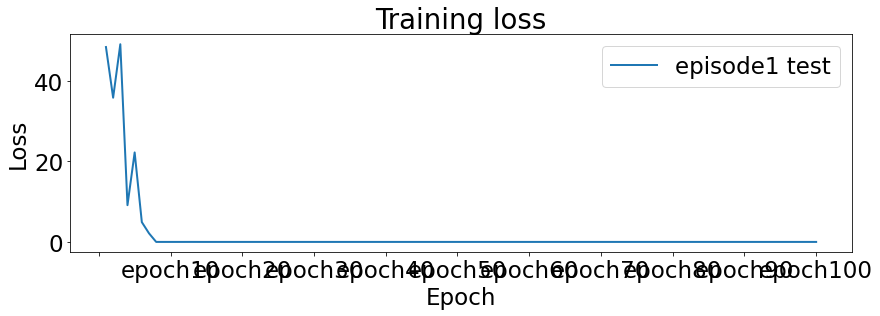

In [141]:
train_loss = pd.read_csv('./logs/optimizer/output_RMSprop/resnet10_simclr_LS_default/crop/05way_005shot_head_default/loss_history.csv', index_col='Unnamed: 0')
plt.plot(train_loss.loc[1], label='episode{} test'.format(1), linewidth=2)
plt.xticks(np.arange(-1, 100, 10))
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.close()
plt.show()

Text(0.5, 1.0, 'Test accuracy')

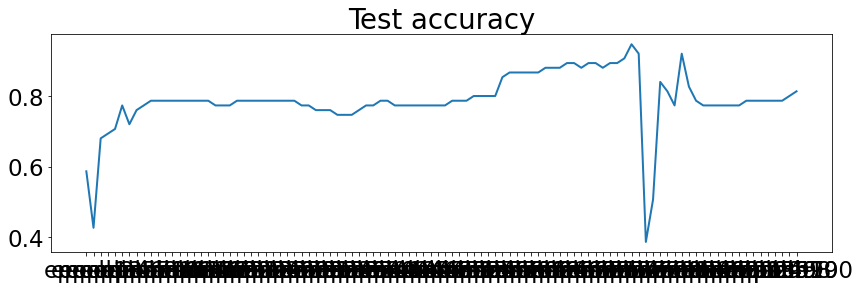

In [142]:
test_perf = pd.read_csv('./logs/optimizer/output_RMSprop/resnet10_simclr_LS_default/crop/05way_005shot_head_default/test_history.csv', index_col='Unnamed: 0')
plt.plot(test_perf.loc[1], linewidth = 2)
plt.title("Test accuracy")

In [9]:
index = []
for top in ['best', 'worst']:
    for rank in range(1, 6):
        index.append(top + str(rank))
column1 = []
for data in datas:
    column1.append(data)
    column1.append(data)

['mini_test',
 'mini_test',
 'crop',
 'crop',
 'euro',
 'euro',
 'isic',
 'isic',
 'chest',
 'chest']

In [19]:
result.columns[1]

('mini_test', '5shot')

### Data Augmentation 논문

In [221]:
result = pd.DataFrame(None, index=['full', 'support restriction', 'query restriction', 'task restriction'], columns=[column1, ['1shot', '5shot']*5])
for type in result.index:
    if type == "support restriction": name = "_5s"
    elif type == "query restriction": name = "_5q"
    elif type == "task restriction": name = "_task"
    else: name = ""
    for file in result.columns:
        path = "./logs/baseline/output/torch_resnet18_simclr_LS_default/{}/05way_00{}_head_default/test_history{}.csv".format(file[0], file[1], name)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[type][file] = acc
        
display(result)

mini_test                        crop                \
                            1shot         5shot         1shot         5shot   
full                 80.01 ± 0.83  96.97 ± 0.19  74.21 ± 0.87  93.12 ± 0.43   
support restriction  80.04 ± 0.81  97.12 ± 0.18  73.91 ± 0.89  93.43 ± 0.41   
query restriction    80.07 ± 0.81  97.22 ± 0.18  74.68 ± 0.81  93.04 ± 0.40   
task restriction     80.83 ± 0.70  97.44 ± 0.16  15.05 ± 0.51  12.86 ± 0.41   

                             euro                        isic                \
                            1shot         5shot         1shot         5shot   
full                 65.49 ± 0.87  85.38 ± 0.52  30.09 ± 0.51  42.41 ± 0.56   
support restriction  63.95 ± 0.84  84.84 ± 0.52  29.89 ± 0.53  43.99 ± 0.53   
query restriction    66.02 ± 0.85  85.29 ± 0.48  29.27 ± 0.52  41.44 ± 0.57   
task restriction     65.69 ± 0.82  84.30 ± 0.57  27.05 ± 0.56  42.67 ± 0.70   

                            chest                
                            1shot         5shot  
full                 22.12 ± 0.39  25.18 ± 0.40  
support restriction  21.69 ± 0.37  23.39 ± 0.38  
query restriction    21.44 ± 0.39  23.82 ± 0.42  
task restriction     21.78 ± 0.39  24.83 ± 0.47

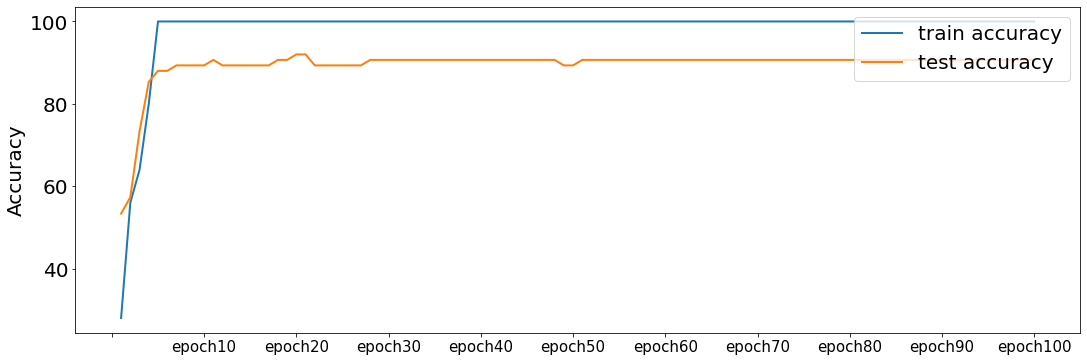

In [68]:
train_path = './logs/baseline/output/torch_resnet18_simclr_LS_default/euro/05way_005shot_head_default/train_history_cls.csv'
test_path = './logs/baseline/output/torch_resnet18_simclr_LS_default/euro/05way_005shot_head_default/test_history_cls.csv'
train_acc = pd.read_csv(train_path, index_col='Unnamed: 0')
test_acc = pd.read_csv(test_path, index_col='Unnamed: 0')
episode = 7
fig = plt.figure(figsize=(18,6))
plt.plot(train_acc.loc[episode]*100, label='train accuracy'.format(episode))
plt.plot(test_acc.loc[episode]*100, label='test accuracy'.format(episode))
plt.xticks(np.arange(-1, 100, 10), fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()
plt.close()

<AxesSubplot:>

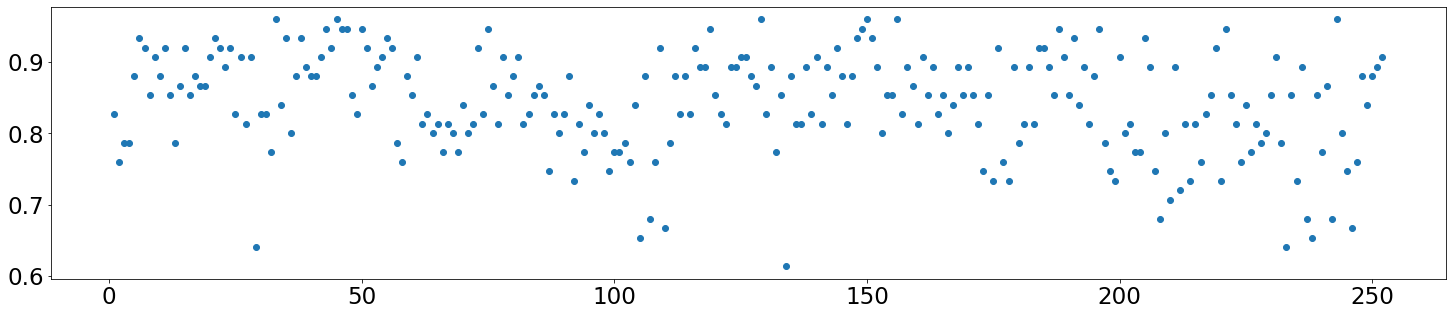

In [60]:
fig = plt.figure(figsize=(25,5))
test_path = './logs/baseline/output/torch_resnet18_simclr_LS_default/euro/05way_005shot_head_default/test_history_task.csv'
test_acc = pd.read_csv(test_path, index_col='Unnamed: 0')
test_acc.iloc[:,-1].plot(marker ='o', linestyle='None')
# 비슷한 클래스 조합 뭉쳐있음

<AxesSubplot:>

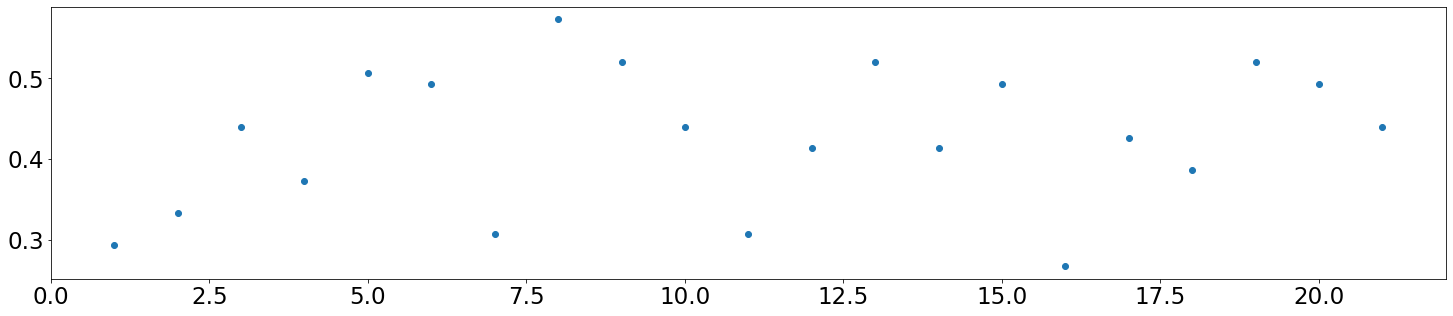

In [62]:
fig = plt.figure(figsize=(25,5))
test_path = './logs/baseline/output/torch_resnet18_simclr_LS_default/isic/05way_005shot_head_default/test_history_task.csv'
test_acc = pd.read_csv(test_path, index_col='Unnamed: 0')
test_acc.iloc[:,-1].plot(marker ='o', linestyle='None')
# 비슷한 클래스 조합 뭉쳐있음

<AxesSubplot:>

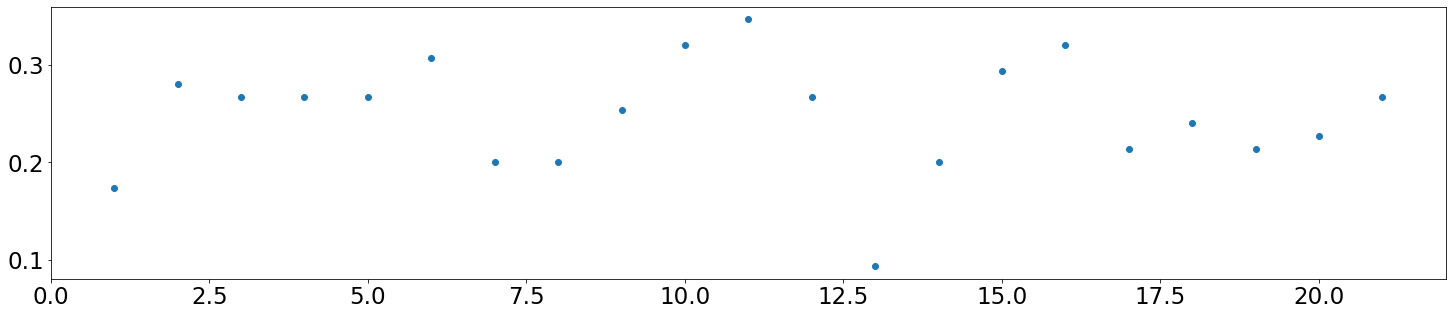

In [63]:
fig = plt.figure(figsize=(25,5))
test_path = './logs/baseline/output/torch_resnet18_simclr_LS_default/chest/05way_005shot_head_default/test_history_task.csv'
test_acc = pd.read_csv(test_path, index_col='Unnamed: 0')
test_acc.iloc[:,-1].plot(marker ='o', linestyle='None')
# 비슷한 클래스 조합 뭉쳐있음

In [70]:
path = "./logs/baseline/output/torch_resnet18_simclr_LS_default/crop/05way_005shot_head_default/test_history_task.csv".format(file[0], file[1], name)
test_acc = pd.read_csv(path, index_col='Unnamed: 0')
test_acc

,epoch1,epoch2,epoch3,epoch4,epoch5,epoch6,epoch7,epoch8,epoch9,epoch10,...,epoch91,epoch92,epoch93,epoch94,epoch95,epoch96,epoch97,epoch98,epoch99,epoch100
1,0.200000,0.160000,0.160000,0.133333,0.120000,0.146667,0.120000,0.120000,0.146667,0.146667,...,0.146667,0.146667,0.146667,0.146667,0.146667,0.146667,0.146667,0.146667,0.146667,0.146667
2,0.120000,0.093333,0.160000,0.080000,0.040000,0.080000,0.080000,0.053333,0.040000,0.053333,...,0.053333,0.053333,0.053333,0.053333,0.053333,0.053333,0.053333,0.053333,0.053333,0.053333
3,0.200000,0.213333,0.213333,0.173333,0.160000,0.106667,0.160000,0.133333,0.093333,0.080000,...,0.093333,0.106667,0.093333,0.106667,0.093333,0.093333,0.093333,0.080000,0.080000,0.080000
4,0.186667,0.240000,0.173333,0.120000,0.133333,0.093333,0.106667,0.066667,0.106667,0.146667,...,0.106667,0.106667,0.106667,0.106667,0.106667,0.106667,0.106667,0.120000,0.120000,0.120000
5,0.160000,0.146667,0.066667,0.053333,0.093333,0.053333,0.053333,0.053333,0.066667,0.066667,...,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.200000,0.146667,0.040000,0.040000,0.106667,0.026667,0.026667,0.053333,0.080000,0.080000,...,0.106667,0.106667,0.106667,0.106667,0.106667,0.106667,0.106667,0.106667,0.106667,0.106667
597,0.013333,0.200000,0.093333,0.173333,0.173333,0.173333,0.213333,0.253333,0.213333,0.226667,...,0.213333,0.213333,0.213333,0.213333,0.213333,0.213333,0.213333,0.213333,0.213333,0.213333
598,0.213333,0.200000,0.213333,0.106667,0.106667,0.160000,0.133333,0.106667,0.066667,0.066667,...,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000
599,0.133333,0.173333,0.106667,0.160000,0.106667,0.120000,0.106667,0.120000,0.120000,0.120000,...,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333


<AxesSubplot:>

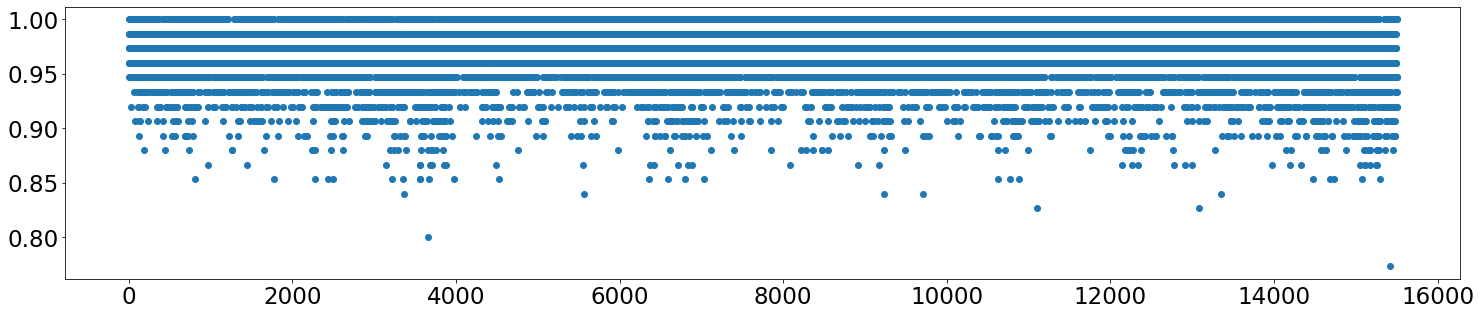

In [75]:
fig = plt.figure(figsize=(25,5))
test_path = './logs/baseline/output/torch_resnet18_simclr_LS_default/mini_test/05way_005shot_head_default/test_history_cls.csv'
test_acc = pd.read_csv(test_path, index_col='Unnamed: 0')
test_acc.iloc[:,-1].plot(marker ='o', linestyle='None')

In [77]:
len(test_acc.iloc[:,-1])

15504

In [232]:
n_class = 10
test_path = './logs/baseline/output/torch_resnet18_simclr_LS_default/euro/05way_001shot_head_default/test_history_cls.csv'
test_acc = pd.read_csv(test_path, index_col='Unnamed: 0')
test_acc_list = test_acc.iloc[:,-1]
col_len = math.comb(n_class-1, 4)
class_list = list(range(n_class))
comb_list = list(combinations(class_list, 5))
acc_by_class = pd.DataFrame(None, index=class_list, columns = range(col_len))
for cls in class_list:
    acc_list = []
    for idx in range(len(comb_list)):
        if cls in comb_list[idx] : 
            acc_list.append(test_acc_list[idx+1])
    acc_by_class.loc[cls] = acc_list

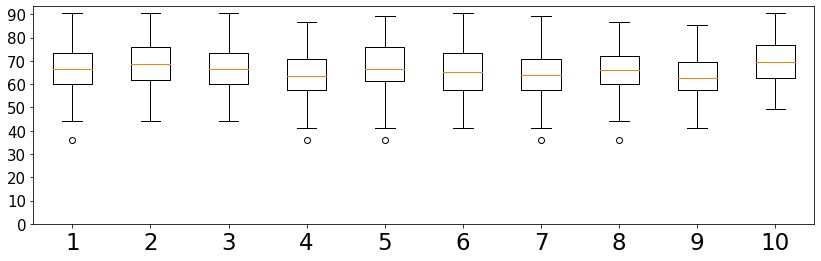

In [233]:
plt.boxplot(acc_by_class.T*100)
plt.yticks(np.arange(0,100, 10), fontsize=15)
plt.show()

In [1]:
acc_by_class

NameError: name 'acc_by_class' is not defined

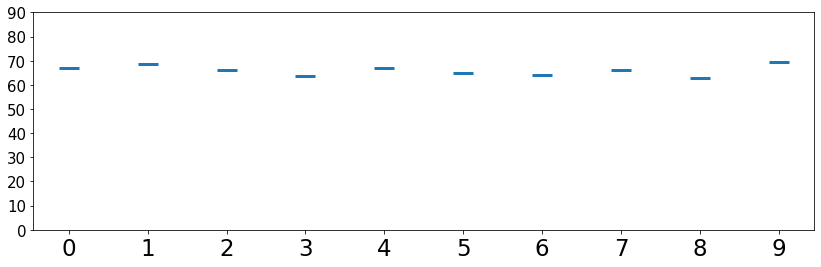

In [234]:
plt.plot(acc_by_class.mean(axis=1)*100, marker = '_', linestyle= 'None',  markersize= 20, markeredgewidth='3')
plt.xticks(class_list)
plt.yticks(np.arange(0,100, 10), fontsize=15)
plt.show()